<a href="https://colab.research.google.com/github/AlexanderDaz2001/ProyectoGradoColab/blob/main/ProyectoGradoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías**

In [ ]:
import random
import math
import numpy as np
import pdb; 
import matplotlib.pyplot as plt
import pandas as pd
import time
plt.style.use('seaborn')

<ipython-input-1-e9850bbaefdc>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7155820974329956940
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15318354680912214680
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!cat /proc/meminfo

MemTotal:       13294256 kB
MemFree:         7298432 kB
MemAvailable:   11214708 kB
Buffers:          326196 kB
Cached:          3793364 kB
SwapCached:            0 kB
Active:           669036 kB
Inactive:        4939552 kB
Active(anon):       1092 kB
Inactive(anon):  1499608 kB
Active(file):     667944 kB
Inactive(file):  3439944 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               876 kB
Writeback:             0 kB
AnonPages:       1484604 kB
Mapped:           759436 kB
Shmem:             11672 kB
KReclaimable:      98976 kB
Slab:             144540 kB
SReclaimable:      98976 kB
SUnreclaim:        45564 kB
KernelStack:        4576 kB
PageTables:        16936 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6647128 kB
Committed_AS:    3223832 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       77256 kB
VmallocChunk:          0 kB
Percpu:          

#**Métodos de generación de números aleatorios y simulación Teorema**

In [ ]:
primos_mersenne = []
primos_congruencia = []
primos_box_muller = []
primos_cuadrados=[]

def me_coprimos(N, metodo):
    coprimos = 0 
    if metodo == 'cuadrados':
      for i in range(N):
        semilla = int(str(i) + '13')  # Usar i como parte de la semilla
        tam1=3
        numero1 = semilla
        numero2 = numero1 ** 2
        snumero2 = str(numero2)
        tam2 = len(snumero2)
        primerc = int((tam2 - tam1) / 2)
        snumero3 = snumero2[primerc:primerc+tam1]
        numero1 = int(snumero3)

        semilla2 = int(str(i) + '7')  # Usar i como parte de la semilla
        tam2=3
        num1 = semilla2
        num2 = num1 ** 2
        str_num2 = str(num2)
        len_num2 = len(str_num2)
        primer_car = int((len_num2 - tam2) / 2)
        str_num3 = str_num2[primer_car:primer_car + tam2]
        num1 = int(str_num3)
        if math.gcd(numero1, num1) == 1:
            coprimos += 1
            primos_cuadrados.append((numero1, num1))

  


    elif metodo == 'mersenne':
      mt = random.Random()
      mt.seed(1234)
      for i in range(N):
        a = mt.randint(1, N)
        b = mt.randint(1, N)
        if math.gcd(a, b) == 1:
            coprimos += 1
            primos_mersenne.append((a,b))
            #primos_mersenne.append(b)




    elif metodo == 'congruencia':
        # Parámetros para el generador de congruencia lineal
      m_1 = 2**31 - 1
      a_1 = 48271
      c_1 = 73
      xi_1 = 1234 # Semilla

      m_2 = 2**31 
      a_2 = 1103515245
      c_2 = 12345
      xi_2 = 1234 # Semilla

      for i in range(N):
        xi_1 = (a_1*xi_1 + c_1) % m_1
        xi_2 = (a_2*xi_2 + c_2) % m_2
        if math.gcd(xi_1, xi_2) == 1:
            coprimos += 1
            primos_congruencia.append((xi_1,xi_2))
            #primos_congruencia.append(xi_2)




    elif metodo == 'box-muller':
    # Establecer la semilla del generador de números aleatorios
      random.seed(31)
    # Generador de números aleatorios con distribución normal por el método de Box-Muller
      u1 = [random.uniform(0, 1) for i in range(N)]
      u2 = [random.uniform(0, 1) for i in range(N)]
      z1 = [math.sqrt(-2 * math.log(u1[i])) * math.cos(2 * math.pi * u2[i]) for i in range(N)]
      z2 = [math.sqrt(-2 * math.log(u1[i])) * math.sin(2 * math.pi * u2[i]) for i in range(N)]
    
      for i in range(N):
        a = round(N * (z1[i]/6 + 0.5))
        b = round(N * (z2[i]/6 + 0.5))
        if a <= 0:
            a = 1
        if b <= 0:
            b = 1
        if math.gcd(a, b) == 1:
            coprimos += 1
            primos_box_muller.append((a,b))

    return coprimos / N

def estimador_pi(N, metodo):
    count_cop = 0
    count_cop += me_coprimos(N, metodo)
    pi_estimador = math.sqrt(6/count_cop)
    return pi_estimador

In [ ]:
primos_mersenne = []
primos_congruencia = []
primos_box_muller = []
primos_cuadrados = []


x = [10,100,1000,10000,100000,1000000,10000000]  # Muestras de datos
y_congruencia = []  # Resultados del estimador de pi para cada muestra utilizando método de congruencia lineal
y_box_muller = []  # Resultados del estimador de pi para cada muestra utilizando método Box-Muller
y_mersenne = []  # Resultados del estimador de pi para cada muestra utilizando método Box-Muller
y_cuadrados = []

#Tiempos metodos
t_mersenne = []
t_cuadrados = []
t_congruencia = []
t_box_muller = []

# **Graficas de los métodos**

In [ ]:
for N in x:
    start_time1 = time.time()
    pi_estimado_mersenne = estimador_pi(N, 'mersenne')
    end_time1 = time.time()
    t_mersenne.append(end_time1 - start_time1)
    y_mersenne.append(pi_estimado_mersenne)

In [ ]:

for N in x:
    start_time2 = time.time()
    pi_estimado_cuadrados = estimador_pi(N, 'cuadrados')
    end_time2 = time.time()
    t_cuadrados.append(end_time2 - start_time2)
    y_cuadrados.append(pi_estimado_cuadrados)

In [ ]:

for N in x:
    start_time3 = time.time()
    pi_estimado_congruencia = estimador_pi(N, 'congruencia')
    end_time3 = time.time()
    t_congruencia.append(end_time3 - start_time3)
    y_congruencia.append(pi_estimado_congruencia)

In [ ]:

for N in x:
    start_time4 = time.time()
    pi_estimado_box_muller = estimador_pi(N, 'box-muller')
    end_time4 = time.time()
    t_box_muller.append(end_time4 - start_time4)
    y_box_muller.append(pi_estimado_box_muller)

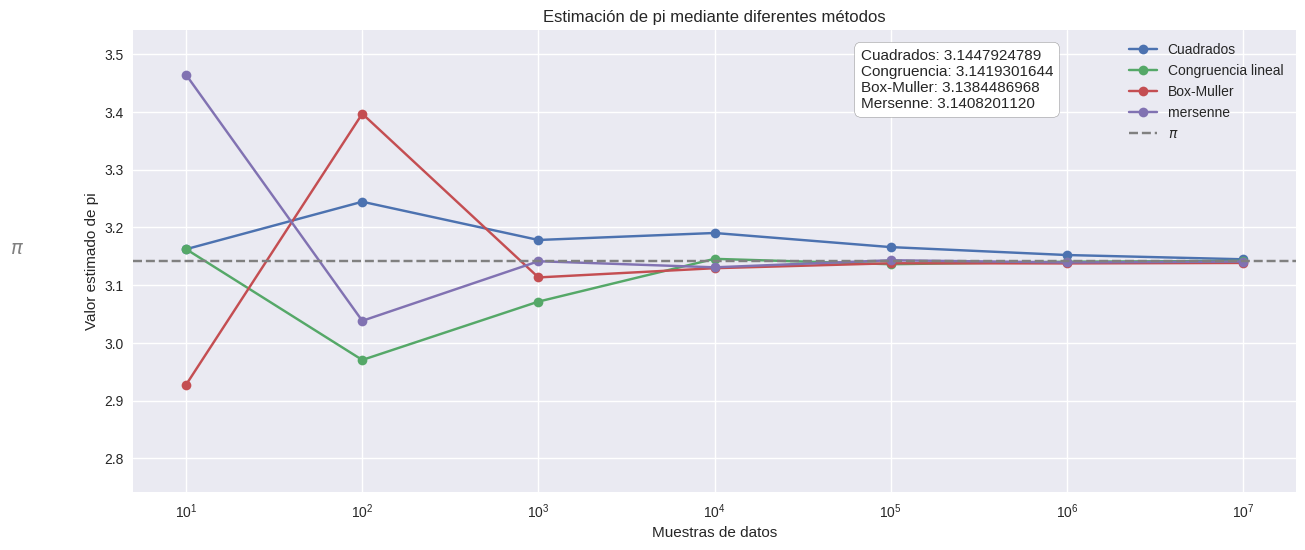

In [ ]:
# Gráfica
plt.figure(figsize=(15,6))
plt.plot(x, y_cuadrados, 'o-', label='Cuadrados')
plt.plot(x, y_congruencia, 'o-', label='Congruencia lineal')
plt.plot(x, y_box_muller, 'o-', label='Box-Muller')
plt.plot(x, y_mersenne, 'o-', label='mersenne')
plt.xscale('log')
plt.title('Estimación de pi mediante diferentes métodos')
plt.xlabel('Muestras de datos')
plt.ylabel('Valor estimado de pi')
plt.ylim(math.pi-0.4, math.pi+0.4) # establecer límites del eje y centrado en el valor estimado de pi
plt.axhline(y=math.pi, color='gray', linestyle='--', label=r'$\pi$') # agregar línea horizontal en el valor de pi
plt.text(1, math.pi+0.005, r'$\pi$', ha='left', va='bottom', color='gray', fontsize=14) # agregar texto indicando que el valor es pi
plt.legend()
plt.grid(True)
# Agregar cuadro de texto con los resultados
cuadro_texto = "Cuadrados: {:.10f}\nCongruencia: {:.10f}\nBox-Muller: {:.10f}\nMersenne: {:.10f}".format(y_cuadrados[-1],y_congruencia[-1], y_box_muller[-1], y_mersenne[-1])
plt.text(0.61, 0.75, cuadro_texto, transform=plt.gcf().transFigure, fontsize=11, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4'))
plt.show()

In [ ]:
print("Tiempo de ejecución del método de Mersenne:")
for i, N in enumerate(x):
    print(f"N={N}: {t_mersenne[i]:.4f} segundos")
print()

print("Tiempo de ejecución del método de los cuadrados medios:")
for i, N in enumerate(x):
    print(f"N={N}: {t_cuadrados[i]:.4f} segundos")
print()

print("Tiempo de ejecución del método de la congruencia lineal:")
for i, N in enumerate(x):
    print(f"N={N}: {t_congruencia[i]:.4f} segundos")
print()

print("Tiempo de ejecución del método de Box-Muller:")
for i, N in enumerate(x):
    print(f"N={N}: {t_box_muller[i]:.4f} segundos")

Tiempo de ejecución del método de Mersenne:
N=10: 0.0005 segundos
N=100: 0.0004 segundos
N=1000: 0.0029 segundos
N=10000: 0.0212 segundos
N=100000: 0.1524 segundos
N=1000000: 2.4800 segundos
N=10000000: 18.9846 segundos

Tiempo de ejecución del método de los cuadrados medios:
N=10: 0.0001 segundos
N=100: 0.0004 segundos
N=1000: 0.0058 segundos
N=10000: 0.0235 segundos
N=100000: 0.2145 segundos
N=1000000: 2.8623 segundos
N=10000000: 26.4957 segundos

Tiempo de ejecución del método de la congruencia lineal:
N=10: 0.0000 segundos
N=100: 0.0001 segundos
N=1000: 0.0013 segundos
N=10000: 0.0139 segundos
N=100000: 0.0795 segundos
N=1000000: 0.8144 segundos
N=10000000: 9.2102 segundos

Tiempo de ejecución del método de Box-Muller:
N=10: 0.0001 segundos
N=100: 0.0004 segundos
N=1000: 0.0040 segundos
N=10000: 0.0266 segundos
N=100000: 0.2071 segundos
N=1000000: 2.3404 segundos
N=10000000: 27.7867 segundos


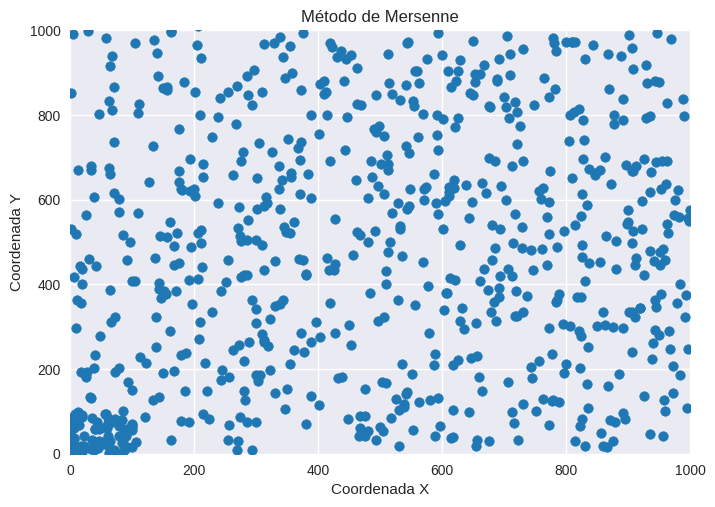

In [ ]:
# Definir una paleta de colores
paleta_colores = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Graficar los puntos generados por el método de Mersenne
plt.scatter(*zip(*primos_mersenne), color=paleta_colores[0])
plt.title('Método de Mersenne')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.xlim([0, 1000])
plt.ylim([0, 1000])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

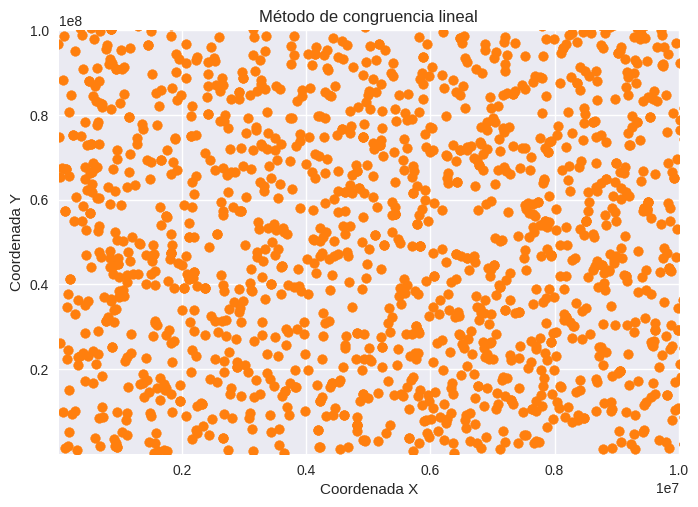

In [ ]:
# Graficar los puntos generados por el método de congruencia lineal
plt.scatter(*zip(*primos_congruencia), color=paleta_colores[1])
plt.title('Método de congruencia lineal')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim([10000, 10000000])
plt.ylim([1000, 100000000])
plt.show()

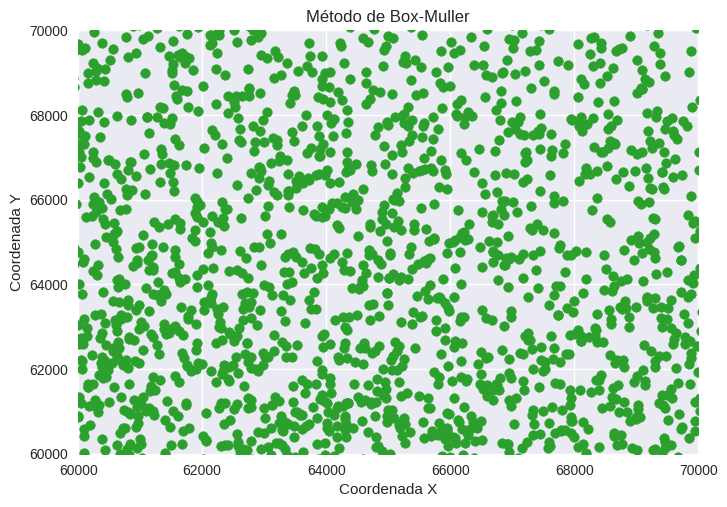

In [ ]:
# Graficar los puntos generados por el método de Box-Muller
plt.scatter(*zip(*primos_box_muller), color=paleta_colores[2])
plt.title('Método de Box-Muller')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim([60000, 70000])
plt.ylim([60000, 70000])
plt.show()

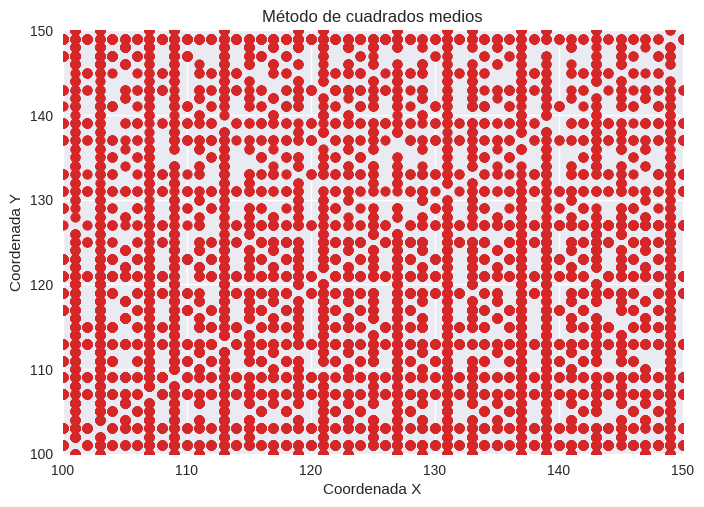

In [ ]:
# Graficar los puntos generados por el método de cuadrados medios
plt.scatter(*zip(*primos_cuadrados), color=paleta_colores[3])
plt.title('Método de cuadrados medios')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlim([100, 150])
plt.ylim([100, 150])
plt.show()


In [ ]:
import numpy as np

# se define una función para calcular la desviación estándar
def stdev(data):
    n = len(data)
    mean = sum(data) / n
    variance = sum((x - mean)**2 for x in data) / (n - 1)
    std_dev = np.sqrt(variance)
    return std_dev

# se calcula la dispersión de cada método
disp_cuadrados = stdev(y_cuadrados)
disp_congruencia = stdev(y_congruencia)
disp_box_muller = stdev(y_box_muller)
disp_mersenne = stdev(y_mersenne)

# se imprimen los resultados
print("Dispersión del método Cuadrados:", disp_cuadrados)
print("Dispersión del método Congruencia lineal:", disp_congruencia)
print("Dispersión del método Box-Muller:", disp_box_muller)
print("Dispersión del método Mersenne:", disp_mersenne)



Dispersión del método Cuadrados: 0.033467751072643735
Dispersión del método Congruencia lineal: 0.06782210600126325
Dispersión del método Box-Muller: 0.13654608606072294
Dispersión del método Mersenne: 0.13460878087234493


#**Análisis de errores**

Tamaño de muestra: 10
Error absoluto - Random: 0.0206850066
Error absoluto - Congruencia lineal: 0.0206850066
Error absoluto - Box-Muller: 0.2138924347
Error absoluto - Mersenne: 0.3225089615
Error porcentual - Random: 0.6584242090%
Error porcentual - Congruencia lineal: 0.6584242090%
Error porcentual - Box-Muller: 6.8084076559%
Error porcentual - Mersenne: 10.2657790844%
Error relativo - Cuadrados: 0.0065842421
Error relativo - Congruencia lineal: 0.0065842421
Error relativo - Box-Muller: 0.0680840766
Error relativo - Mersenne: 0.1026577908

Tamaño de muestra: 100
Error absoluto - Random: 0.1028357690
Error absoluto - Congruencia lineal: 0.1711500247
Error absoluto - Box-Muller: 0.2552384488
Error absoluto - Mersenne: 0.1033745523
Error porcentual - Random: 3.2733641934%
Error porcentual - Congruencia lineal: 5.4478744870%
Error porcentual - Box-Muller: 8.1244921601%
Error porcentual - Mersenne: 3.2905141989%
Error relativo - Cuadrados: 0.0327336419
Error relativo - Congruencia lineal

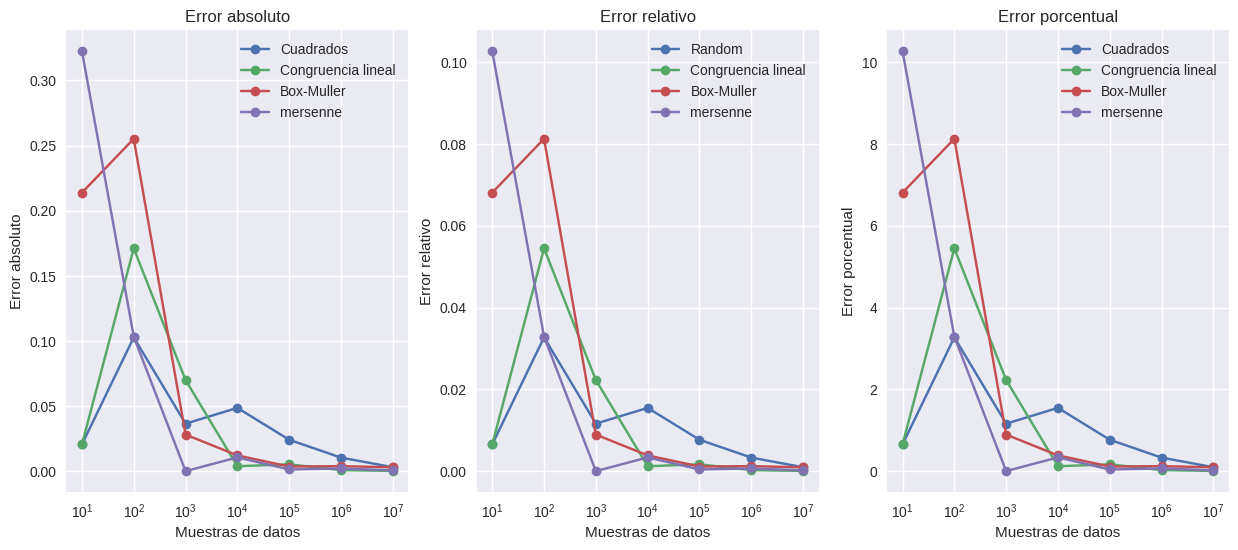

In [ ]:
# Cálculo de errores para cada método
errores_cuadrados = []
errores_congruencia = []
errores_box_muller = []
errores_mersenne = []

errores_cuadrados_porcentual = []
errores_congruencia_porcentual = []
errores_box_muller_porcentual = []
errores_mersenne_porcentual = []

errores_cuadrados_relativos = []
errores_congruencia_relativos = []
errores_box_muller_relativos = []
errores_mersenne_relativos = []

for i in range(len(y_congruencia)):
    errores_cuadrados.append(abs(y_cuadrados[i] - math.pi))
    errores_congruencia.append(abs(y_congruencia[i] - math.pi))
    errores_box_muller.append(abs(y_box_muller[i] - math.pi))
    errores_mersenne.append(abs(y_mersenne[i] - math.pi))
    
    # Imprimir errores para cada tamaño de muestra
    print(f"Tamaño de muestra: {x[i]}")
    print(f"Error absoluto - Random: {errores_cuadrados[i]:.10f}")
    print(f"Error absoluto - Congruencia lineal: {errores_congruencia[i]:.10f}")
    print(f"Error absoluto - Box-Muller: {errores_box_muller[i]:.10f}")
    print(f"Error absoluto - Mersenne: {errores_mersenne[i]:.10f}")
    
    # Errores porcentuales
    errores_cuadrados_porcentual.append(abs((math.pi - y_cuadrados[i])/math.pi)*100)
    errores_congruencia_porcentual.append(abs((math.pi - y_congruencia[i])/math.pi)*100)
    errores_box_muller_porcentual.append(abs((math.pi - y_box_muller[i])/math.pi)*100)
    errores_mersenne_porcentual.append(abs((math.pi - y_mersenne[i])/math.pi)*100)
    
    # Imprimir errores porcentuales
    print(f"Error porcentual - Random: {errores_cuadrados_porcentual[i]:.10f}%")
    print(f"Error porcentual - Congruencia lineal: {errores_congruencia_porcentual[i]:.10f}%")
    print(f"Error porcentual - Box-Muller: {errores_box_muller_porcentual[i]:.10f}%")
    print(f"Error porcentual - Mersenne: {errores_mersenne_porcentual[i]:.10f}%")
    
    # Errores relativos
    errores_cuadrados_relativos.append(errores_cuadrados[i]/math.pi)
    errores_congruencia_relativos.append(errores_congruencia[i]/math.pi)
    errores_box_muller_relativos.append(errores_box_muller[i]/math.pi)
    errores_mersenne_relativos.append(errores_mersenne[i]/math.pi)

    
    
    # Imprimir errores relativos
    print(f"Error relativo - Cuadrados: {errores_cuadrados_relativos[i]:.10f}")
    print(f"Error relativo - Congruencia lineal: {errores_congruencia_relativos[i]:.10f}")
    print(f"Error relativo - Box-Muller: {errores_box_muller_relativos[i]:.10f}")
    print(f"Error relativo - Mersenne: {errores_mersenne_relativos[i]:.10f}\n")


# Gráfica de errores
plt.figure(figsize=(15,6))

# Error absoluto
plt.subplot(1, 3, 1)
plt.plot(x, errores_cuadrados, 'o-', label='Cuadrados')
plt.plot(x, errores_congruencia, 'o-', label='Congruencia lineal')
plt.plot(x, errores_box_muller, 'o-', label='Box-Muller')
plt.plot(x, errores_mersenne, 'o-', label='mersenne')
plt.xscale('log')
plt.title('Error absoluto')
plt.xlabel('Muestras de datos')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid(True)


# Error relativo
plt.subplot(1, 3, 2)
plt.plot(x, errores_cuadrados_relativos, 'o-', label='Random')
plt.plot(x, errores_congruencia_relativos, 'o-', label='Congruencia lineal')
plt.plot(x, errores_box_muller_relativos, 'o-', label='Box-Muller')
plt.plot(x, errores_mersenne_relativos, 'o-', label='mersenne')
plt.xscale('log')
plt.title('Error relativo')
plt.xlabel('Muestras de datos')
plt.ylabel('Error relativo')
plt.legend()
plt.grid(True)

# Error porcentual
plt.subplot(1, 3, 3)
plt.plot(x, errores_cuadrados_porcentual, 'o-', label='Cuadrados')
plt.plot(x, errores_congruencia_porcentual, 'o-', label='Congruencia lineal')
plt.plot(x, errores_box_muller_porcentual, 'o-', label='Box-Muller')
plt.plot(x, errores_mersenne_porcentual, 'o-', label='mersenne')
plt.xscale('log')
plt.title('Error porcentual')
plt.xlabel('Muestras de datos')
plt.ylabel('Error porcentual')
plt.legend()
plt.grid(True)


plt.show()

#**DataFrame**

In [ ]:
# Crear una lista con los datos de cada método
data = []
for i in range(len(y_cuadrados)):
    cuadrados_data = {
        'TamañoMuestra': x[i],
        'Método': 'Cuadrados',
        'Aprox': y_cuadrados[i],
        'Error abs': errores_cuadrados[i],
        'Error %': errores_cuadrados_porcentual[i],
        'Error relativo': errores_cuadrados_relativos[i],
        'tiempo seg': t_cuadrados[i],
        'Dispersión': disp_cuadrados,
    }
    
    congruencia_data = {
        'TamañoMuestra': x[i],
        'Método': 'Congruencia lineal',
        'Aprox': y_congruencia[i],
        'Error abs': errores_congruencia[i],
        'Error %': errores_congruencia_porcentual[i],
        'Error relativo': errores_congruencia_relativos[i],
        'tiempo seg': t_congruencia[i],
        'Dispersión': disp_congruencia,
    }
    Box_Muller_data = {
            'TamañoMuestra': x[i],
            'Método': 'Box Muller',
            'Aprox': y_box_muller[i],
            'Error abs': errores_box_muller[i],
            'Error %': errores_box_muller_porcentual[i],
            'Error relativo': errores_box_muller_relativos[i],
            'tiempo seg':t_box_muller[i],
            'Dispersión': disp_box_muller
        }
    Mersenne_data = {
            'TamañoMuestra': x[i],
            'Método': 'Mersenne',
            'Aprox': y_mersenne[i],
            'Error abs': errores_mersenne[i],
            'Error %': errores_mersenne_porcentual[i],
            'Error relativo': errores_mersenne_relativos[i],
            'tiempo seg':t_mersenne[i],
            'Dispersión': disp_mersenne,
        }
    
    data.append(cuadrados_data)
    data.append(congruencia_data)
    data.append(Box_Muller_data)
    data.append(Mersenne_data)

# Crear el dataframe
df = pd.DataFrame(data)

# Establecer el tamaño de muestra como índice
df = df.set_index('TamañoMuestra')

# Reordenar las columnas
column_order = ['Método', 'Aprox', 'Error abs', 'Error %', 'Error relativo', 'tiempo seg', 'Dispersión']
df = df.reindex(column_order, axis=1)

# Establecer opciones de formato para el dataframe
pd.set_option('display.precision', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.multi_sparse', False)
df = df.sort_values(by=['TamañoMuestra'])

# Mostrar el dataframe
display(df)


,Método,Aprox,Error abs,Error %,Error relativo,tiempo seg,Dispersión
TamañoMuestra,,,,,,,
10,Cuadrados,3.1622776602,0.0206850066,0.6584242090,0.0065842421,0.0000574589,0.0334677511
10,Congruencia lineal,3.1622776602,0.0206850066,0.6584242090,0.0065842421,0.0000247955,0.0678221060
10,Box Muller,2.9277002188,0.2138924347,6.8084076559,0.0680840766,0.0000867844,0.1365460861
10,Mersenne,3.4641016151,0.3225089615,10.2657790844,0.1026577908,0.0004863739,0.1346087809
100,Cuadrados,3.2444284226,0.1028357690,3.2733641934,0.0327336419,0.0003859997,0.0334677511
100,Congruencia lineal,2.9704426289,0.1711500247,5.4478744870,0.0544787449,0.0001208782,0.0678221060
100,Box Muller,3.3968311024,0.2552384488,8.1244921601,0.0812449216,0.0003929138,0.1365460861
100,Mersenne,3.0382181013,0.1033745523,3.2905141989,0.0329051420,0.0004107952,0.1346087809
1000,Cuadrados,3.1782086308,0.0366159772,1.1655227544,0.0116552275,0.0057539940,0.0334677511


#**Graficá conclusión**

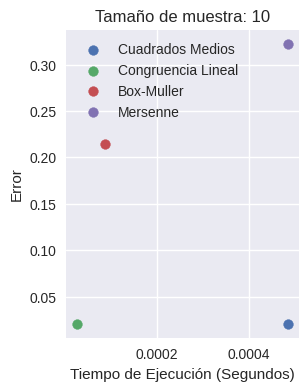

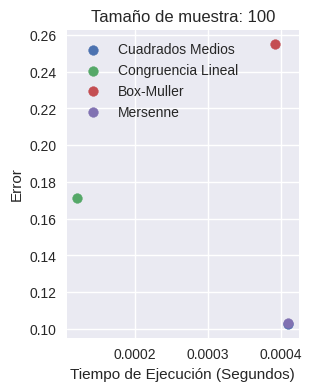

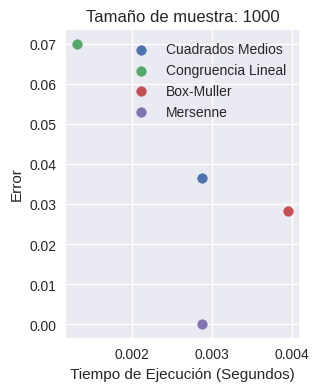

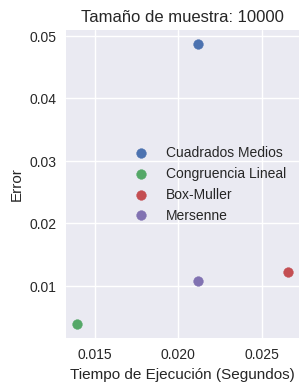

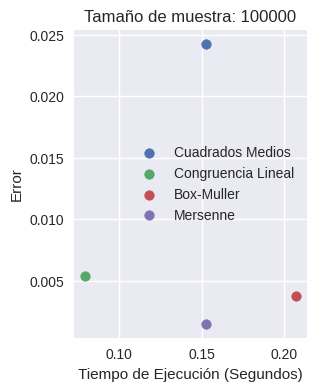

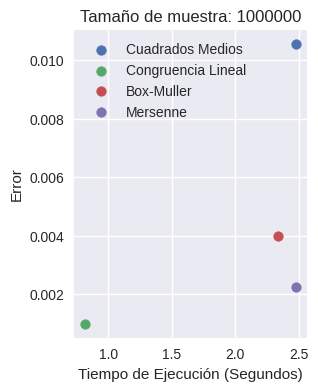

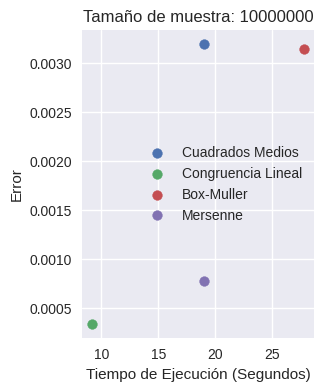

In [ ]:
# Iterar sobre cada tamaño de muestra y crear el gráfico correspondiente
for i, tamano_muestra in enumerate(x):
    plt.figure(figsize=(3, 4))  # Ajustar el tamaño de la figura (ancho: 8 pulgadas, altura: 4 pulgadas)
    
    plt.scatter(t_mersenne[i], errores_cuadrados[i], label='Cuadrados Medios')
    plt.scatter(t_congruencia[i], errores_congruencia[i], label='Congruencia Lineal')
    plt.scatter(t_box_muller[i], errores_box_muller[i], label='Box-Muller')
    plt.scatter(t_mersenne[i], errores_mersenne[i], label='Mersenne')

    plt.title(f'Tamaño de muestra: {x[i]}')
    plt.xlabel('Tiempo de Ejecución (Segundos)')
    plt.ylabel('Error')
    #plt.legend(handlelength=0)
    plt.legend()
    plt.show()